In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def plot(sig, sample_rate, freq_only = False, log = False, fftshift = True):
  plt.subplot(2, 1, 1)
  plt.title("Time Domain")
  x = np.linspace(0, len(sig)/sample_rate, len(sig))
  plt.plot(x, sig)

  if freq_only:
    plt.gca().set_visible(False)

  plt.subplot(2, 1, 2)
  plt.title("Frequency Domain")
  x = np.linspace(-sample_rate/2, sample_rate/2, len(sig))
  fft = np.abs(np.fft.fft(sig))
  if fftshift:
    fft = np.fft.fftshift(fft)
  if log:
    plt.gca().set_yscale('log')
  plt.plot(x, fft)


  plt.tight_layout()

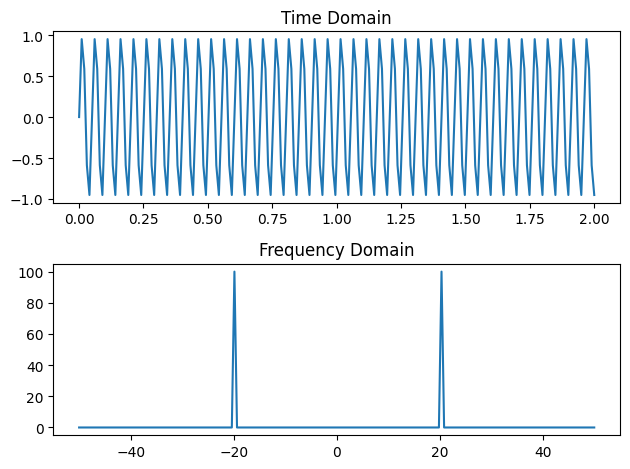

In [9]:
#Plot of sin wave
sample_rate = 100
duration = 2
freq = 20
sin = [np.sin(2*np.pi*freq*x/sample_rate) for x in range(sample_rate*duration)]
plot(sin, sample_rate)
#Frequency Domain: https://pysdr.org/content/frequency_domain.html

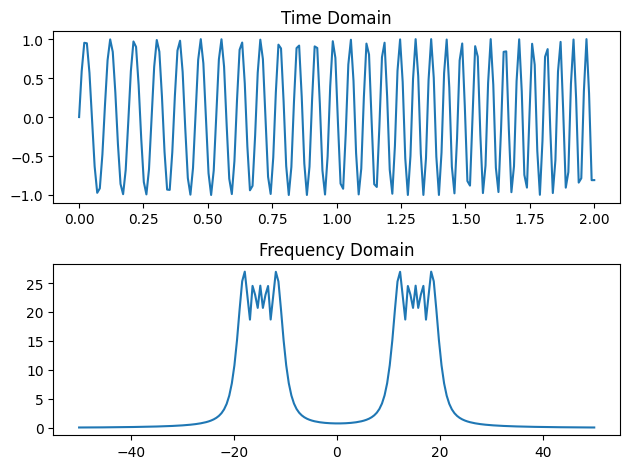

In [10]:
#Plot of ramping freq signal
sample_rate = 100
duration = 2
L = sample_rate * duration
freqs = np.linspace(10, 15, L)
sig = [np.sin(2*np.pi*freqs[x]*x/sample_rate) for x in range(L)]
plot(sig, sample_rate)

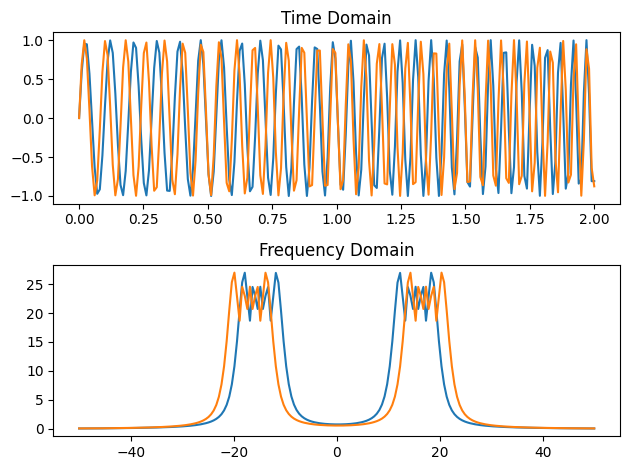

In [11]:
#Plot of multiple ramping freq signals
sample_rate = 100
duration = 2
L = sample_rate * duration
freqs1 = np.linspace(10, 15, L)
freqs2 = np.linspace(12, 17, L)
sig1 = [np.sin(2*np.pi*freqs1[x]*x/sample_rate) for x in range(L)]
sig2 = [np.sin(2*np.pi*freqs2[x]*x/sample_rate) for x in range(L)]
plot(sig1, sample_rate)
plot(sig2, sample_rate)

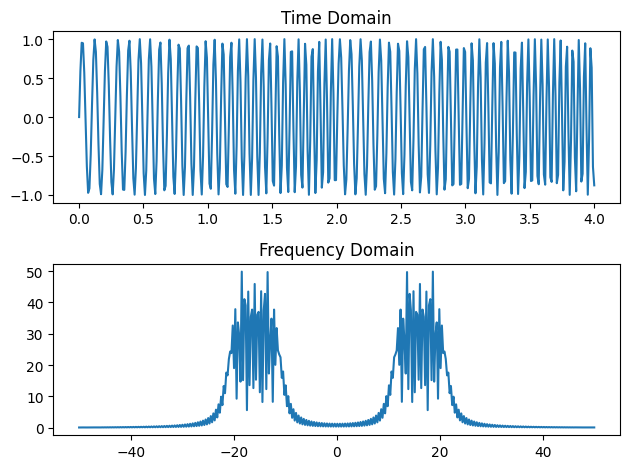

In [12]:
#Plot sum of multiple ramping freq signals
sample_rate = 100
duration = 2
L = sample_rate * duration
freqs1 = np.linspace(10, 15, L)
freqs2 = np.linspace(12, 17, L)
sig1 = [np.sin(2*np.pi*freqs1[x]*x/sample_rate) for x in range(L)]
sig2 = [np.sin(2*np.pi*freqs2[x]*x/sample_rate) for x in range(L)]
plot(sig + sig2, sample_rate)

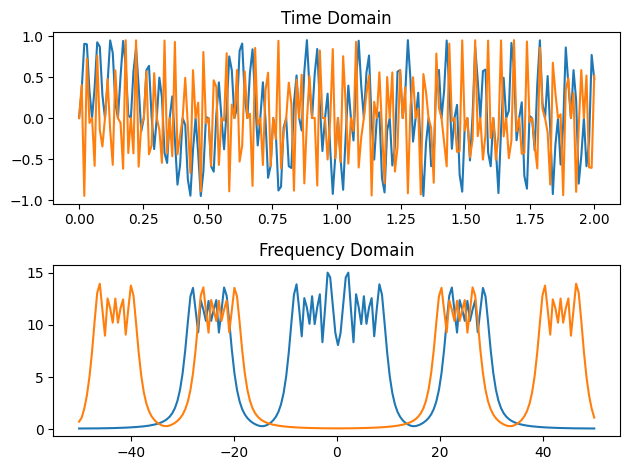

In [13]:
#Introducing the carrier
sample_rate = 100
duration = 2
L = sample_rate * duration
freqs1 = np.linspace(10, 15, L)
freqs2 = np.linspace(12, 17, L)
sig1 = [np.sin(2*np.pi*freqs1[x]*x/sample_rate) for x in range(L)]
sig2 = [np.sin(2*np.pi*freqs2[x]*x/sample_rate) for x in range(L)]

carrier_freqs = [10, 40]
carrier1 = [np.sin(2*np.pi*carrier_freqs[0]*x/sample_rate) for x in range(L)]
carrier2 = [np.sin(2*np.pi*carrier_freqs[1]*x/sample_rate) for x in range(L)]

plot([sig1[x]*carrier1[x] for x in range(L)], sample_rate)
plot([sig2[x]*carrier2[x] for x in range(L)], sample_rate)

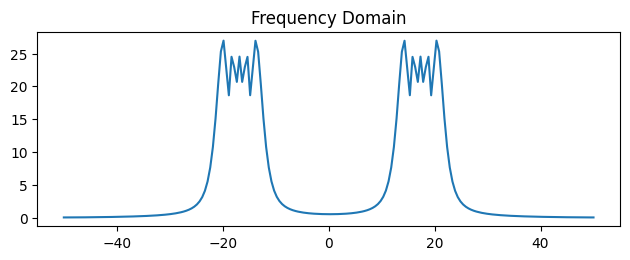

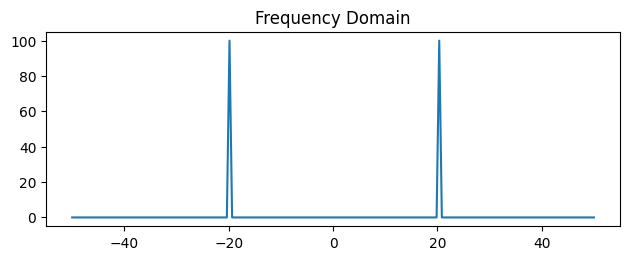

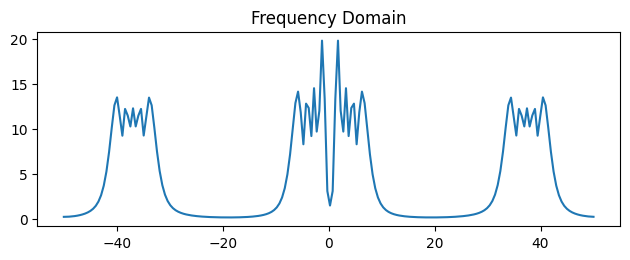

In [14]:
#What does multiplication by a carrier do?
sample_rate = 100
duration = 2
L = sample_rate * duration
freqs = np.linspace(12, 17, L)
sig = [np.sin(2*np.pi*freqs[x]*x/sample_rate) for x in range(L)]

carrier_freq = 20
carrier = [np.sin(2*np.pi*carrier_freq*x/sample_rate) for x in range(L)]

plot(sig, sample_rate, freq_only = True)
plt.show()
plot(carrier, sample_rate, freq_only = True)
plt.show()
plot([sig[x]*carrier[x] for x in range(L)], sample_rate, freq_only = True)
#Convolution: https://en.wikipedia.org/wiki/Convolution

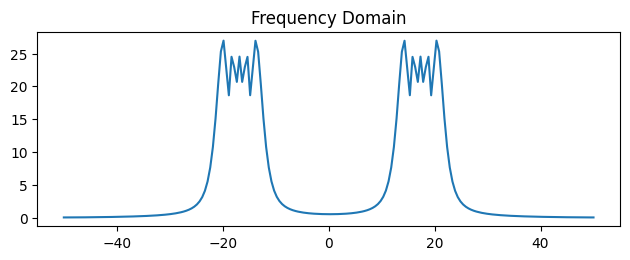

/home/kprior/.local/lib/python3.9/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/kprior/.local/lib/python3.9/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


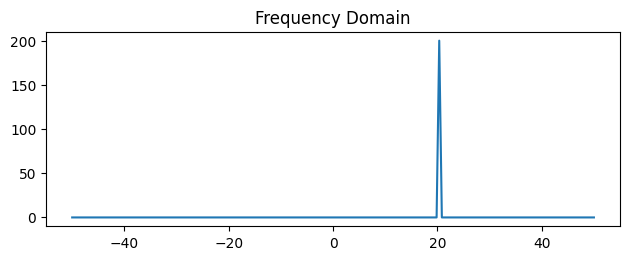

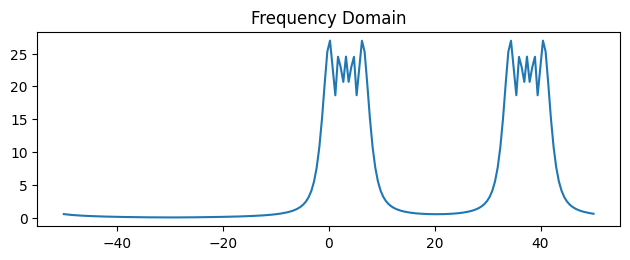

In [15]:
#Introducing Complex Carrier
sample_rate = 100
duration = 2
L = sample_rate * duration
freqs = np.linspace(12, 17, L)
sig = [np.sin(2*np.pi*freqs[x]*x/sample_rate) for x in range(L)]

carrier_freq = 20
#Euler's formula: e^(ix) = cos(x) + i sin(x)
#https://www.acs.psu.edu/drussell/Demos/complex/complex.html
carrier = [np.cos(2*np.pi*carrier_freq*x/sample_rate) + 1j*np.sin(2*np.pi*carrier_freq*x/sample_rate) for x in range(L)]
#OR
carrier = [np.exp(1j*2*np.pi*carrier_freq*x/sample_rate) for x in range(L)]

plot(sig, sample_rate, freq_only = True)
plt.show()
plot(carrier, sample_rate, freq_only = True)
plt.show()
plot([sig[x]*carrier[x] for x in range(L)], sample_rate, freq_only = True)

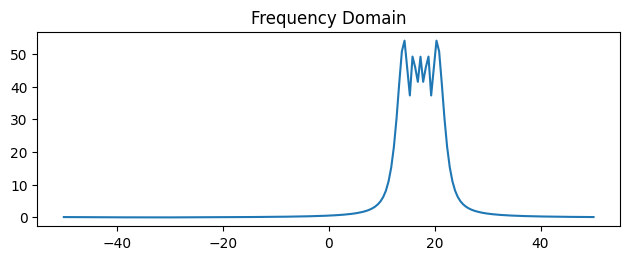

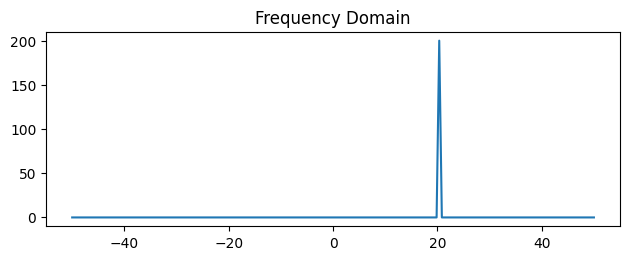

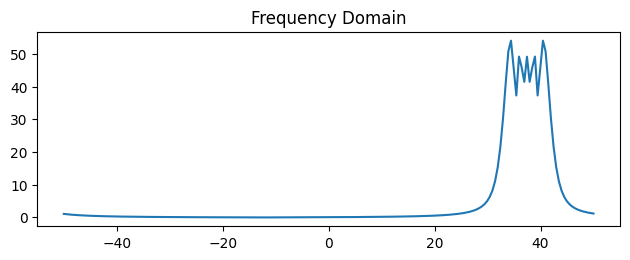

In [16]:
#Complex signal and complex carrier
sample_rate = 100
duration = 2
L = sample_rate * duration
freqs = np.linspace(12, 17, L)
sig = [np.exp(1j*2*np.pi*freqs[x]*x/sample_rate) for x in range(L)]

carrier_freq = 20
carrier = [np.exp(1j*2*np.pi*carrier_freq*x/sample_rate) for x in range(L)]

plot(sig, sample_rate, freq_only = True)
plt.show()
plot(carrier, sample_rate, freq_only = True)
plt.show()
plot([sig[x]*carrier[x] for x in range(L)], sample_rate, freq_only = True)

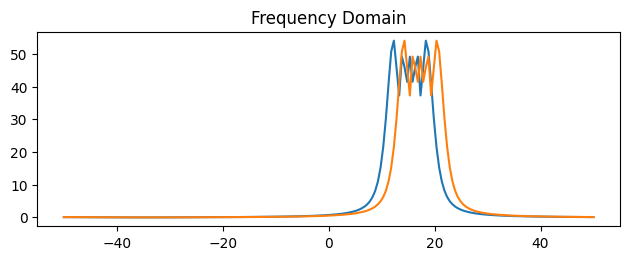

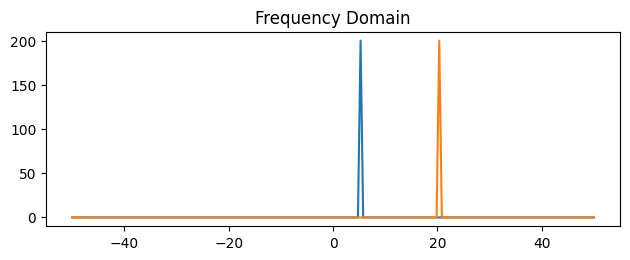

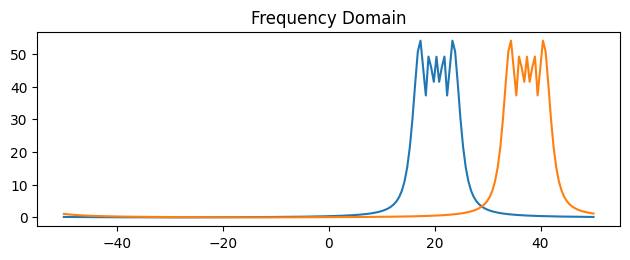

In [17]:
#Bringing it all together
sample_rate = 100
duration = 2
L = sample_rate * duration
freqs1 = np.linspace(10, 15, L)
freqs2 = np.linspace(12, 17, L)
sig1 = [np.exp(1j*2*np.pi*freqs1[x]*x/sample_rate) for x in range(L)]
sig2 = [np.exp(1j*2*np.pi*freqs2[x]*x/sample_rate) for x in range(L)]

carrier_freqs = [5, 20]
carrier1 = [np.exp(1j*2*np.pi*carrier_freqs[0]*x/sample_rate) for x in range(L)]
carrier2 = [np.exp(1j*2*np.pi*carrier_freqs[1]*x/sample_rate) for x in range(L)]

plot(sig1, sample_rate, freq_only = True)
plot(sig2, sample_rate, freq_only = True)
plt.show()

plot(carrier1, sample_rate, freq_only = True)
plot(carrier2, sample_rate, freq_only = True)
plt.show()

plot([sig1[x]*carrier1[x] for x in range(L)], sample_rate, freq_only = True)
plot([sig2[x]*carrier2[x] for x in range(L)], sample_rate, freq_only = True)

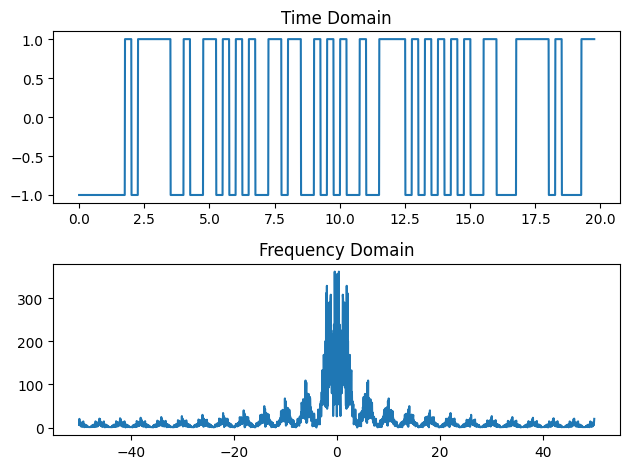

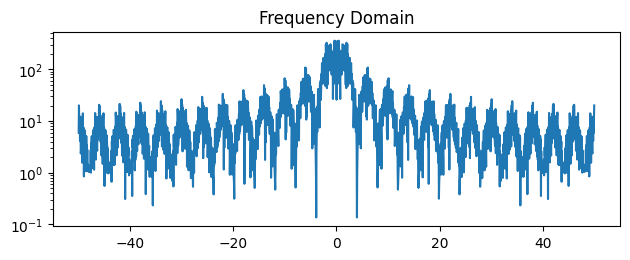

In [18]:
#Going digital
import random
def gen_pam(bit_rate, sample_rate, duration, pulse_shape = None):
  samples_per_bit = int(sample_rate/bit_rate)
  bit_seq = [random.choice([-1, 1]) for x in range(int(bit_rate * duration))]
  if pulse_shape is None:
    pulse_shape = np.ones(int(sample_rate/bit_rate))

  upsampled_bits = np.concatenate([np.append(x, np.zeros(samples_per_bit-1)) for x in bit_seq])
  sig = np.convolve(pulse_shape, upsampled_bits, 'valid')
  return sig

sig = gen_pam(bit_rate = 40, sample_rate = 1000, duration = 2)
plot(sig, sample_rate)
plt.show()

plot(sig, sample_rate, freq_only = True, log=True)

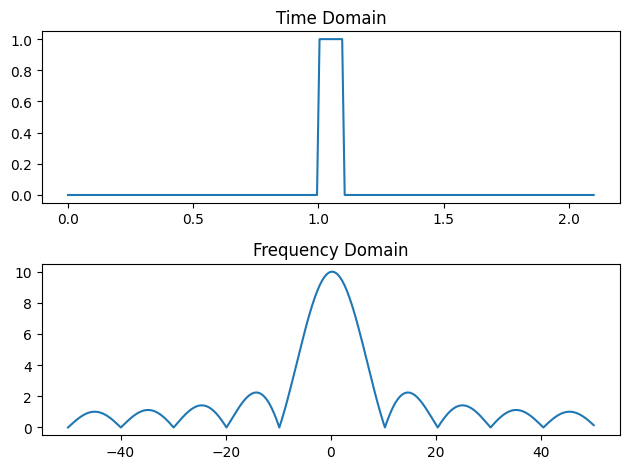

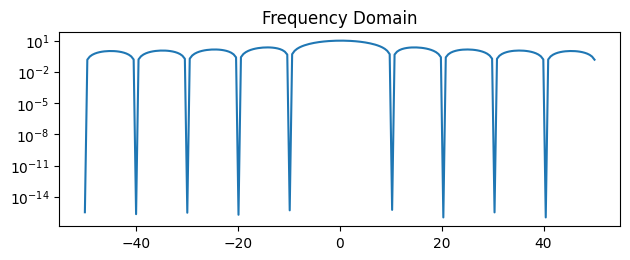

In [19]:
#Spectrum of rectangular pulse
rect = np.concatenate([np.zeros(100), np.ones(10), np.zeros(100)])
#What happens when we shorten the rectangle?
plot(rect, sample_rate = 100)
plt.show()
plot(rect, sample_rate = 100, freq_only = True, log = True)

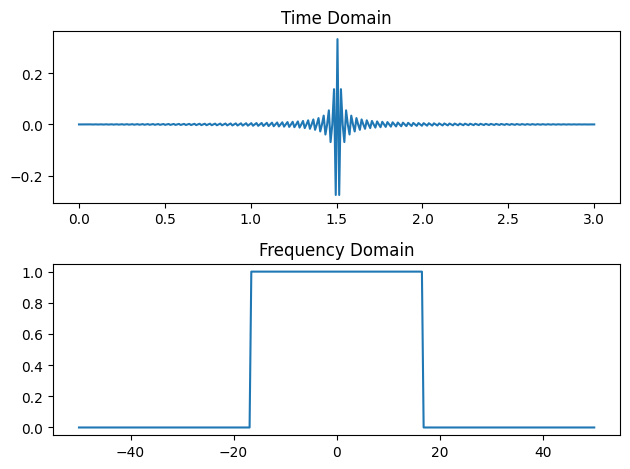

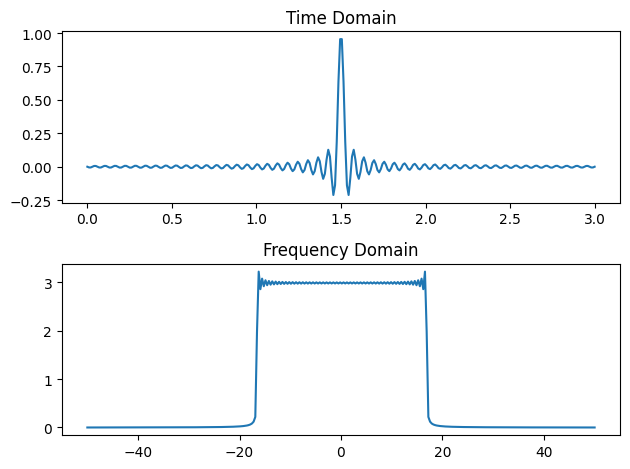

In [20]:
#Introducing Pulse Shaping
#What would the ideal pulse shape look like?

rect = np.concatenate([np.zeros(100), np.ones(100), np.zeros(100)])
plot(np.fft.fftshift(np.fft.ifft(rect)), sample_rate = 100, fftshift=False)
plt.show()

sinc = [np.sinc(x) for x in np.linspace(-50, 50, 300)]
plot(sinc, sample_rate = 100)

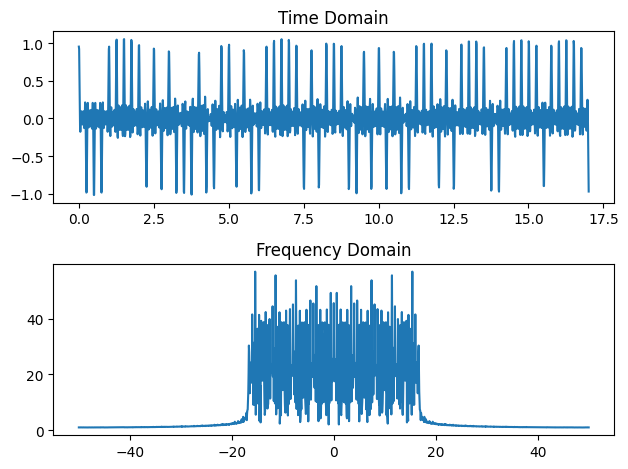

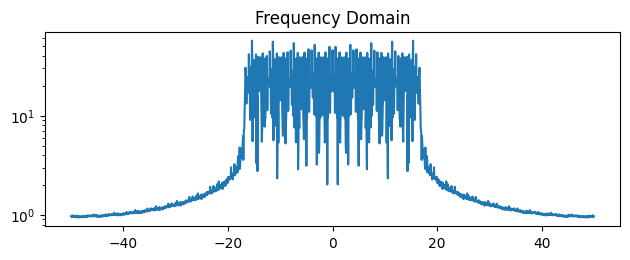

In [21]:
#Using sinc as pulse shape
sinc = [np.sinc(x) for x in np.linspace(-50, 50, 300)]
sig = gen_pam(bit_rate = 40, sample_rate = 1000, duration = 2, pulse_shape=sinc)
plot(sig, sample_rate)
plt.show()

plot(sig, sample_rate, freq_only = True, log=True)

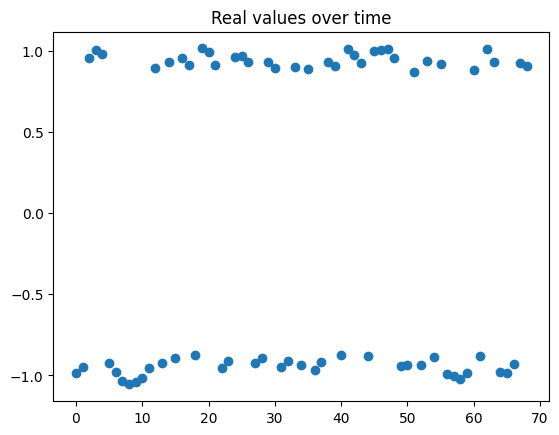

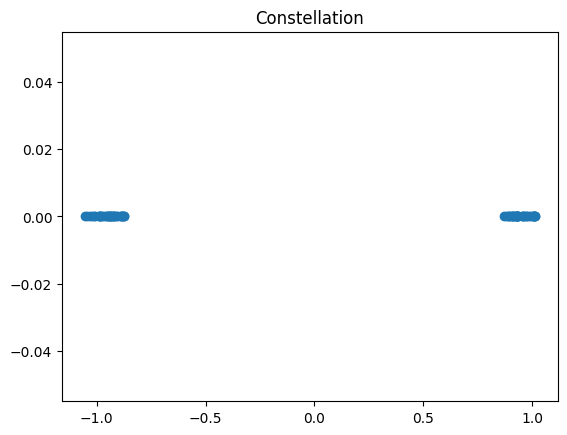

In [22]:
#Demodulation
sinc = [np.sinc(x) for x in np.linspace(-50, 50, 300)]
bit_rate = 40
sample_rate = 1000
sig = gen_pam(bit_rate, sample_rate, duration = 2, pulse_shape=sinc)

samples_per_bit = int(sample_rate/bit_rate) #we might use samples per symbol here
bits = sig[::samples_per_bit]#down samples the bits

plt.scatter(range(len(bits)), bits)
plt.title("Real values over time")
plt.show()

plt.title("Constellation")
plt.scatter(np.real(bits), np.imag(bits))
plt.show()
#this is classic bpsk

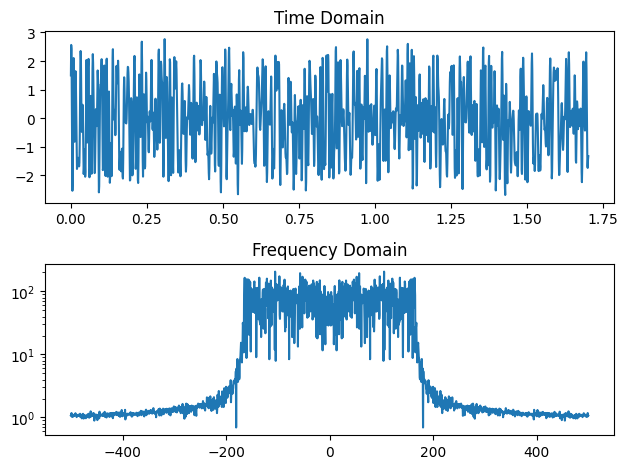

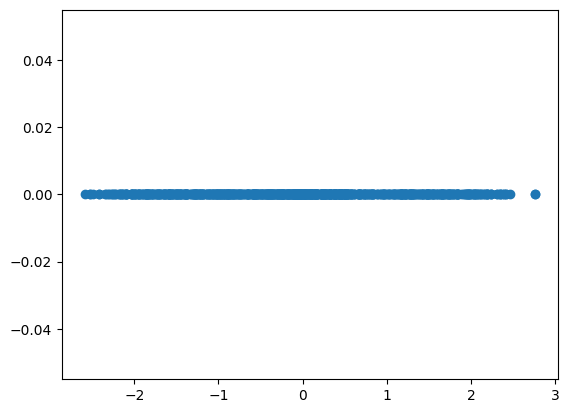

In [23]:
#Up the bit rate
sinc = [np.sinc(x) for x in np.linspace(-50, 50, 300)]
bit_rate = 500
sample_rate = 1000
samples_per_bit = int(sample_rate/bit_rate)
sig = gen_pam(bit_rate, sample_rate, duration = 2, pulse_shape=sinc)
bits = sig[::samples_per_bit] #down sample to get just the bits we want

plot(sig, sample_rate, log=True)
plt.show()

plt.scatter(np.real(bits), np.imag(bits))
plt.show()

In [24]:
#Raised cosine to the rescue!

!pip install scikit-commpy
from commpy import filters

Defaulting to user installation because normal site-packages is not writeable


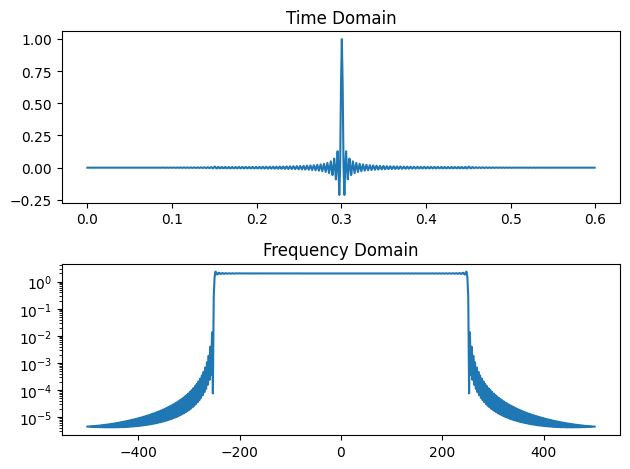

In [25]:
#https://en.wikipedia.org/wiki/Raised-cosine_filter
#https://pysdr.org/content/pulse_shaping.html
#https://wirelesspi.com/pulse-shaping-filter/
bit_rate = 500
sample_rate = 1000
samples_per_bit = int(sample_rate/bit_rate)
time, pulse_shape = filters.rrcosfilter(300, 0, samples_per_bit/sample_rate, sample_rate)
pulse_shape = np.convolve(pulse_shape, pulse_shape)/2

plot(pulse_shape, sample_rate, log=True)

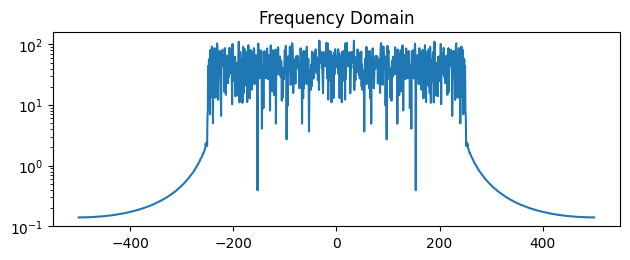

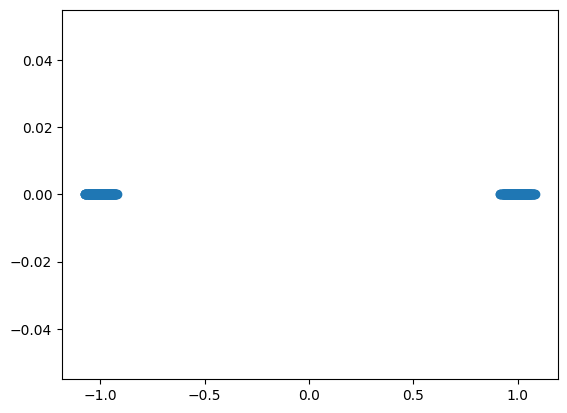

In [26]:
bit_rate = 500
sample_rate = 1000
samples_per_bit = int(sample_rate/bit_rate)
time, pulse_shape = filters.rrcosfilter(300, 0, samples_per_bit/sample_rate, sample_rate)
pulse_shape = np.convolve(pulse_shape, pulse_shape)/2
sig = gen_pam(bit_rate, sample_rate, duration = 2, pulse_shape=pulse_shape)
bits = sig[::samples_per_bit]

plot(sig, sample_rate, freq_only = True, log=True)
plt.show()

plt.scatter(np.real(bits), np.imag(bits))
plt.show()

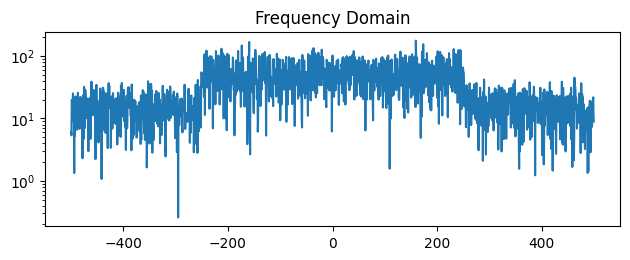

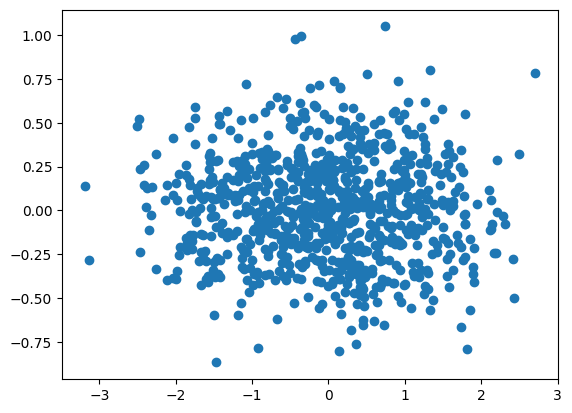

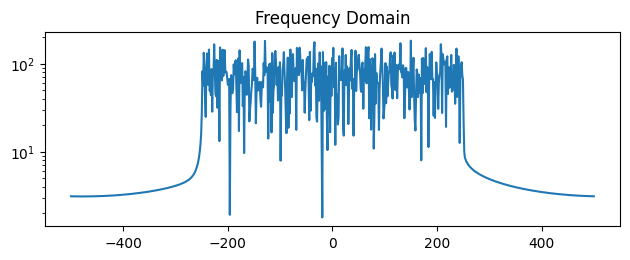

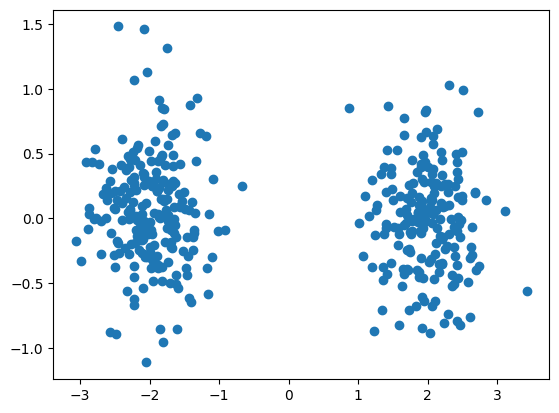

In [27]:
#Split the raised cosine filter to negate noise!
bit_rate = 500
sample_rate = 1000
samples_per_bit = int(sample_rate/bit_rate)
time, pulse_shape = filters.rrcosfilter(300, 0, samples_per_bit/sample_rate, sample_rate)
sig1 = gen_pam(bit_rate, sample_rate, duration = 2, pulse_shape=pulse_shape)

pulse_shape = np.convolve(pulse_shape, pulse_shape)/2
sig2 = gen_pam(bit_rate, sample_rate, duration = 2, pulse_shape=pulse_shape)

#CHANNEL NOISE
mean = 0
variance = 0.3
length = len(sig1)
noise = np.random.normal(mean, variance,  length) + 1j*np.random.normal(mean, variance,  length)

sig1 = [sig1[x] + noise[x] for x in range(len(sig1))]
sig2 = [sig2[x] + noise[x] for x in range(len(sig2))]

plot(sig1, sample_rate, freq_only = True, log=True)
plt.show()
bits = sig1[::samples_per_bit]
plt.scatter(np.real(bits), np.imag(bits))
plt.show()

sig2 = np.convolve(sig2, pulse_shape, 'valid')
plot(sig2, sample_rate, freq_only = True, log=True)
plt.show()
bits = sig2[::samples_per_bit]
plt.scatter(np.real(bits), np.imag(bits))
plt.show()

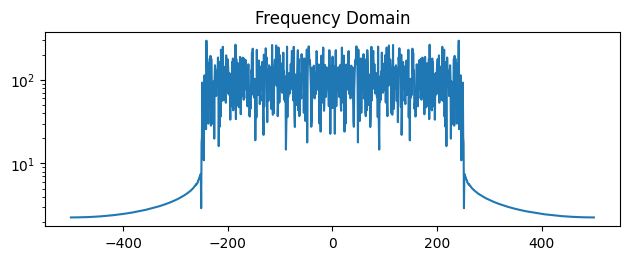

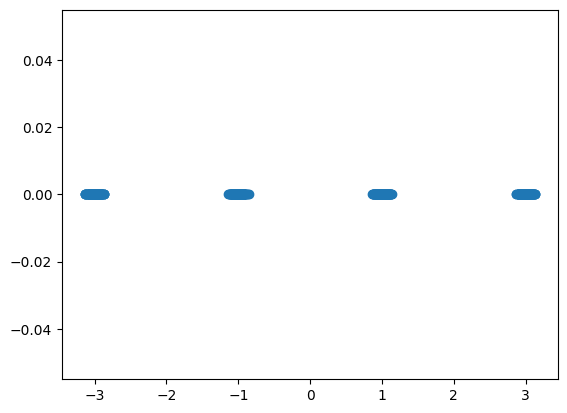

In [28]:
#More than one bit per symbol?
def four_pam(bit_rate, sample_rate, duration, pulse_shape = None):
  samples_per_bit = int(sample_rate/bit_rate)
  bit_seq = [random.choice([-3, -1, 1, 3]) for x in range(int(bit_rate * duration))]
  if pulse_shape is None:
    pulse_shape = np.ones(int(sample_rate/bit_rate))

  upsampled_bits = np.concatenate([np.append(x, np.zeros(samples_per_bit-1)) for x in bit_seq])
  sig = np.convolve(pulse_shape, upsampled_bits, 'valid')
  return sig

bit_rate = 500
sample_rate = 1000
samples_per_bit = int(sample_rate/bit_rate)
time, pulse_shape = filters.rrcosfilter(300, 0, samples_per_bit/sample_rate, sample_rate)
pulse_shape = np.convolve(pulse_shape, pulse_shape)/2
sig = four_pam(bit_rate, sample_rate, duration = 2, pulse_shape=pulse_shape)
bits = sig[::samples_per_bit]

plot(sig, sample_rate, freq_only = True, log=True)
plt.show()

plt.scatter(np.real(bits), np.imag(bits))
plt.show()

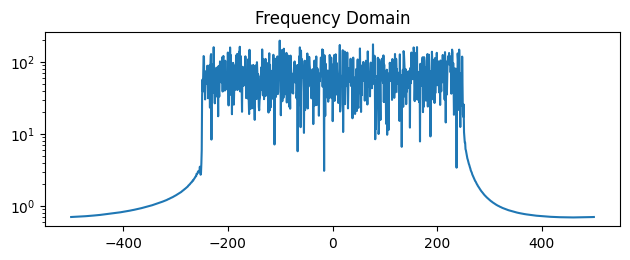

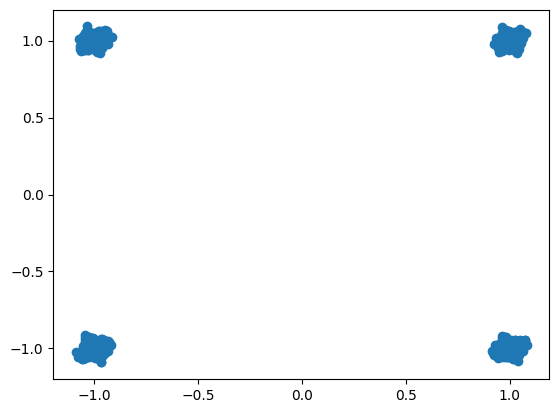

In [ ]:
#Can we reduce the energy required to transmit?
#(Can we use the constellation space more effectively?)

def four_qam(bit_rate, sample_rate, duration, pulse_shape = None):
  samples_per_bit = int(sample_rate/bit_rate)
  bit_seq = [randomfor x in symbols.choice([-1-1j, -1+1j, 1-1j, 1+1j]) for x in range(int(bit_rate * duration))]
  if pulse_shape is None:
    pulse_shape = np.ones(int(sample_rate/bit_rate))

  upsampled_bits = np.concatenate([np.append(x, np.zeros(samples_per_bit-1)) for x in bit_seq])
  sig = np.convolve(pulse_shape, upsampled_bits, 'valid')
  return sig

bit_rate = 500
sample_rate = 1000
samples_per_bit = int(sample_rate/bit_rate)
time, pulse_shape = filters.rrcosfilter(300, 0, samples_per_bit/sample_rate, sample_rate)
pulse_shape = np.convolve(pulse_shape, pulse_shape)/2
sig = four_qam(bit_rate, sample_rate, duration = 2, pulse_shape=pulse_shape)
bits = sig[::samples_per_bit]

plot(sig, sample_rate, freq_only = True, log=True)
plt.show()

plt.scatter(np.real(bits), np.imag(bits))
plt.show()


In [30]:
#Various possibilities
#https://pysdr.org/content/digital_modulation.html
#What trade offs are we concerned about?

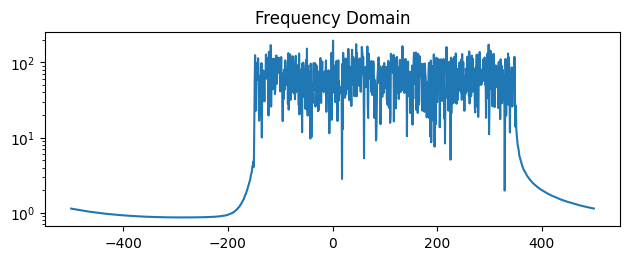

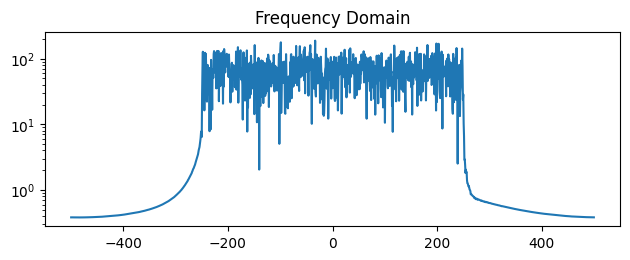

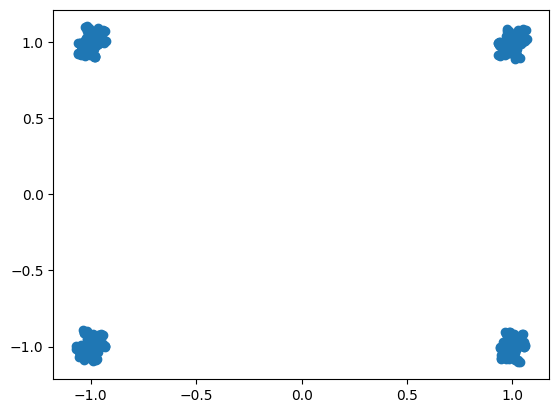

In [35]:
#What if our Rx oscilater is out of phase?
#https://en.wikipedia.org/wiki/Phase-locked_loop
bit_rate = 500
sample_rate = 1000
samples_per_bit = int(sample_rate/bit_rate)
time, pulse_shape = filters.rrcosfilter(300, 0, samples_per_bit/sample_rate, sample_rate)
pulse_shape = np.convolve(pulse_shape, pulse_shape)/2
sig = four_qam(bit_rate, sample_rate, duration = 2, pulse_shape=pulse_shape)

#Upconvert
freq = 100
carrier = [np.exp(1j*2*np.pi*freq*x/sample_rate) for x in range(len(sig))]
sig = [sig[x] * carrier[x] for x in range(len(sig))]
plot(sig, sample_rate, freq_only = True, log=True)
plt.show()


#Downconvert
phase_offset = np.pi/2
carrier = [np.exp(1j*2*np.pi*(-freq)*x/sample_rate + 1j*phase_offset) for x in range(len(sig))]

#What about frequency offset?
sig = [sig[x] * carrier[x] for x in range(len(sig))]

bits = sig[::samples_per_bit]

plot(sig, sample_rate, freq_only = True, log=True)
plt.show()

plt.scatter(np.real(bits), np.imag(bits))
plt.show()

In [32]:
#A phase offset of pi/4 does not look rotated...
#https://en.wikipedia.org/wiki/Differential_coding
#

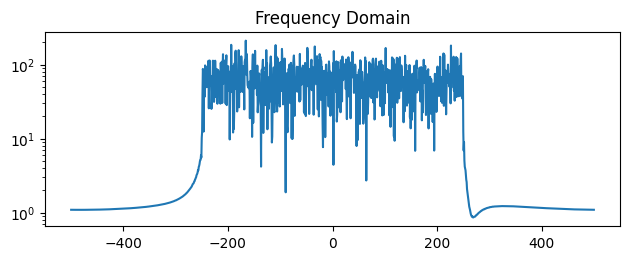

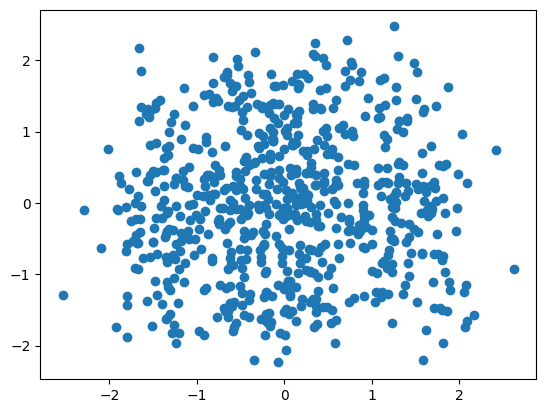

In [33]:
#What if you're picking the wrong sample?
#https://wirelesspi.com/what-is-a-symbol-timing-offset-and-how-it-distorts-the-rx-signal/

bit_rate = 500
sample_rate = 1000
samples_per_bit = int(sample_rate/bit_rate)
time, pulse_shape = filters.rrcosfilter(300, 0, samples_per_bit/sample_rate, sample_rate)
pulse_shape = np.convolve(pulse_shape, pulse_shape)/2
sig = four_qam(bit_rate, sample_rate, duration = 2, pulse_shape=pulse_shape)
bits = sig[1::samples_per_bit]

plot(sig, sample_rate, freq_only = True, log=True)
plt.show()

plt.scatter(np.real(bits), np.imag(bits))
plt.show()

In [34]:
#Further reading
#https://pysdr.org/content/intro.html
#https://jackschaedler.github.io/circles-sines-signals/